<a href="https://colab.research.google.com/github/thangnc423/MMASH-dataset-processing-and-models/blob/main/MMASH_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X_selected_joint = pd.read_csv('drive/MyDrive/CS256/X_selected.csv')
y_df_joint = pd.read_csv('drive/MyDrive/CS256/y_df.csv')
X_selected = pd.read_csv('drive/MyDrive/CS256/X_selected2.csv')
y_df = pd.read_csv('drive/MyDrive/CS256/y_df2.csv')

In [ ]:
print(y_df_joint['Activity'].value_counts(normalize=True))
print(y_df['Activity'].value_counts(normalize=True))

Activity
Laying down            0.451496
Eating                 0.171655
Sitting                0.124309
Heavy movement         0.111041
Small screen usage     0.097354
Large screen usage     0.017989
Medium movement        0.011495
Alcohol consumption    0.007353
Sleeping               0.007308
Name: proportion, dtype: float64
Activity
Sitting                          0.289633
Laying down                      0.268062
Eating                           0.168170
Heavy movement                   0.117888
Small screen usage               0.084543
Medium movement                  0.030822
Sleeping                         0.019875
Alcohol consumption              0.007961
Large screen usage               0.006198
Light movement                   0.003115
Caffeinated drink consumption    0.003049
Smoking                          0.000684
Name: proportion, dtype: float64


# **Model Development**

## **Explore Models**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

### **With user-separated labels**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_df, test_size=0.2, random_state=42, stratify=y_df)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Train models
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())  # Flatten y for sklearn
    trained_models[name] = model

for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)

    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("")

Decision Tree Accuracy: 0.2809673940097901
Macro F1 Score: 0.10375378717034241

K-Nearest Neighbors Accuracy: 0.26005973616527006
Macro F1 Score: 0.09889483072992289

Naive Bayes Accuracy: 0.23118725628474238
Macro F1 Score: 0.07701196026134617

Random Forest Accuracy: 0.32520949141292627
Macro F1 Score: 0.10754260234156748

Neural Network Accuracy: 0.32904671036256533
Macro F1 Score: 0.08580685450227438



### **With joint-user labels**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_joint, y_df_joint, test_size=0.2, random_state=42, stratify=y_df_joint)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

# Train models
trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())  # Flatten y for sklearn
    trained_models[name] = model

for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)

    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Macro F1 Score:", f1_score(y_test, y_pred, average='macro'))
    print("")

Decision Tree Accuracy: 0.4174030109089355
Macro F1 Score: 0.13854313547246544

K-Nearest Neighbors Accuracy: 0.16862372185954078
Macro F1 Score: 0.0758443123233903

Naive Bayes Accuracy: 0.4363574198925133
Macro F1 Score: 0.10322105606850965

Random Forest Accuracy: 0.43059844219118953
Macro F1 Score: 0.13068188496455135

Neural Network Accuracy: 0.4514974410479416
Macro F1 Score: 0.06912362491309859



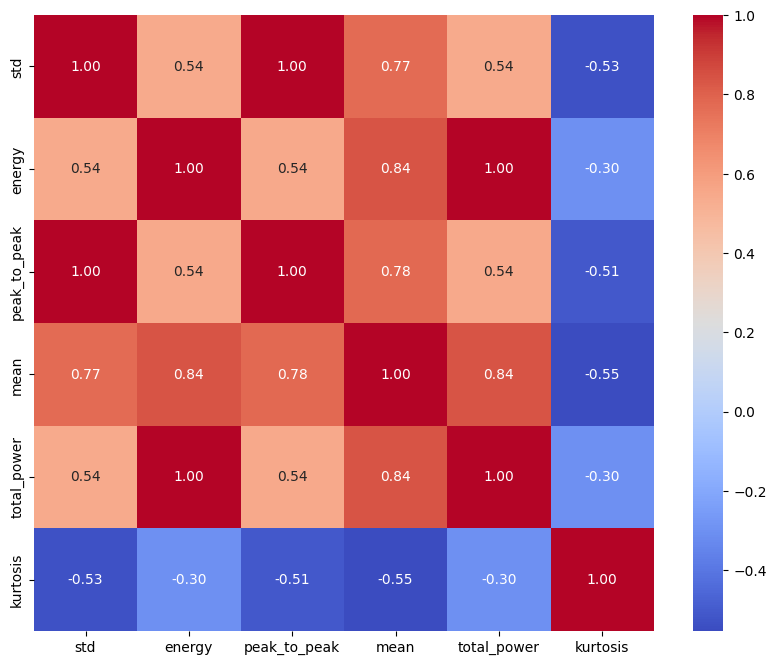

In [ ]:
import seaborn as sns

# Visualize feature correlations
corr_matrix = X_selected_joint.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

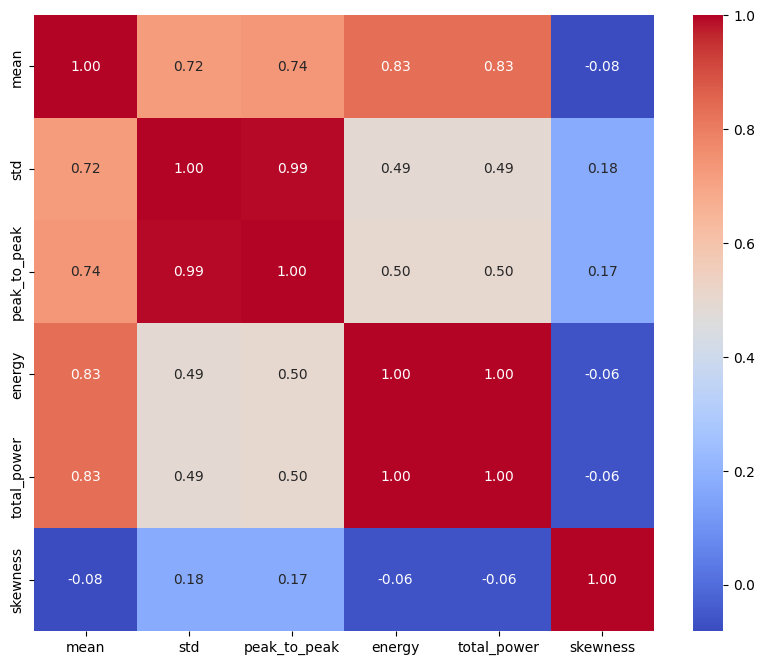

In [ ]:
# Visualize feature correlations
corr_matrix = X_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

The joint dataset shows better performance on both accuracy and F1 scores for most simple models. As such, I will be using it to training more advanced models.

## **Deep Learning Models**

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D, LSTM, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_joint, y_df_joint, test_size=0.2, random_state=42, stratify=y_df_joint)

le = LabelEncoder()

# encode the labels because the cnn doesn't accept str for labels
y_train_enc = le.fit_transform(y_train.values.ravel())
y_test_enc = le.transform(y_test.values.ravel())

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

X_train_expanded = np.expand_dims(X_train, axis=-1)
X_test_expanded = np.expand_dims(X_test, axis=-1)

In [ ]:
cnn_configs = {
    'cnn_1': {'filters': 32, 'kernel_size': 3, 'dense_units': 64, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    'cnn_2': {'filters': 64, 'kernel_size': 5, 'dense_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    'cnn_3': {'filters': 64, 'kernel_size': 3, 'dense_units': 64, 'dropout_rate': 0.5, 'learning_rate': 0.0005},
    'cnn_4': {'filters': 128, 'kernel_size': 5, 'dense_units': 128, 'dropout_rate': 0.5, 'learning_rate': 0.0005},
    'cnn_5': {'filters': 32, 'kernel_size': 2, 'dense_units': 32, 'dropout_rate': 0.2, 'learning_rate': 0.001},
}

trained_cnn_models = {}

for name, config in cnn_configs.items():
    print(f"Training {name}...")

    model = Sequential([
        Conv1D(filters=config['filters'], kernel_size=config['kernel_size'], activation='relu', input_shape=(X_train.shape[1], 1)),
        GlobalAveragePooling1D(),
        Dense(config['dense_units'], activation='relu'),
        Dropout(config['dropout_rate']),
        Dense(y_train_cat.shape[1], activation='softmax')
    ])

    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_expanded, y_train_cat, epochs=3, batch_size=32, verbose=1)

    trained_cnn_models[name] = model

Training cnn_1...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4467 - loss: 267.8264
Epoch 2/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.4509 - loss: 1.5366
Epoch 3/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.4513 - loss: 1.5554
Training cnn_2...
Epoch 1/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4482 - loss: 114.4927
Epoch 2/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.4538 - loss: 1.5426
Epoch 3/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.4525 - loss: 1.5668
Training cnn_3...
Epoch 1/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.4463 - loss: 228.0322
Epoch 2/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.4529 - loss: 1.5392
Epoch 3/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.4512 - loss: 1.5424
Training cnn_4...
Epoch 1/3
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4463 - loss: 175.9949
Epoch 2/3
11700/11700 ━━━━━━━━━━━━━━━━

In [ ]:
lstm_configs = {
    'lstm_1': {'lstm_units': 64, 'num_layers': 1, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    'lstm_2': {'lstm_units': 128, 'num_layers': 1, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    'lstm_3': {'lstm_units': 64, 'num_layers': 2, 'dropout_rate': 0.3, 'learning_rate': 0.001},
    'lstm_4': {'lstm_units': 64, 'num_layers': 1, 'dropout_rate': 0.5, 'learning_rate': 0.001},
    'lstm_5': {'lstm_units': 64, 'num_layers': 1, 'dropout_rate': 0.3, 'learning_rate': 0.005},
}

trained_lstm_models = {}

for name, config in lstm_configs.items():
    print(f"Training {name}...")

    model = Sequential()

    for i in range(config['num_layers']):
        return_sequences = (i < config['num_layers'] - 1)
        model.add(LSTM(units=config['lstm_units'], return_sequences=return_sequences,
                       input_shape=(X_train.shape[1], 1) if i == 0 else None))
        model.add(Dropout(config['dropout_rate']))

    model.add(Dense(y_train_cat.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_expanded, y_train_cat, epochs=3, batch_size=32, verbose=1)

    trained_lstm_models[name] = model

Training lstm_1...
Epoch 1/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.4467 - loss: 1.5535
Epoch 2/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.4512 - loss: 1.5293
Epoch 3/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4499 - loss: 1.5292
Epoch 4/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4493 - loss: 1.5319
Epoch 5/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.4510 - loss: 1.5291
Training lstm_2...
Epoch 1/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 75s 6ms/step - accuracy: 0.4488 - loss: 1.5439
Epoch 2/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 73s 6ms/step - accuracy: 0.4513 - loss: 1.5283
Epoch 3/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 72s 6ms/step - accuracy: 0.4514 - loss: 1.5288
Epoch 4/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 85s 6ms/step - accuracy: 0.4515 - loss: 1.5256
Epoch 5/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.4510 - loss: 1.5275
Training lstm_3...
Epoch 1/5
11700/11700 ━━━━━━━━━━━━━━━━━━━━ 

# **Advanced Model**

## **Transfer Learning**

Pre-trained model used:
https://huggingface.co/AutonLab/MOMENT-1-small

In [ ]:
!pip install git+https://github.com/moment-timeseries-foundation-model/moment.git

  Cloning https://github.com/moment-timeseries-foundation-model/moment.git to /tmp/pip-req-build-a8qzteg3
  Running command git clone --filter=blob:none --quiet https://github.com/moment-timeseries-foundation-model/moment.git /tmp/pip-req-build-a8qzteg3
  Resolved https://github.com/moment-timeseries-foundation-model/moment.git to commit 37a8bde4eb3dd340bebc9b54a3b893bcba62cd4f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from momentfm import MOMENTPipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_joint, y_df_joint, test_size=0.2, random_state=42, stratify=y_df_joint)

class TimeSeriesWindowDataset(Dataset):
    def __init__(self, X, y, window_size=100):
        self.X = X
        self.y = y
        self.window_size = window_size

        self.samples = []
        self.labels = []
        for i in range(0, len(X) - window_size, window_size):
            self.samples.append(X[i:i+window_size].T)  # Transpose to [channels, forecast_horizon]
            self.labels.append(y[i+window_size-1])     # Label based on last row

        self.samples = torch.tensor(np.stack(self.samples), dtype=torch.float32)
        self.labels = torch.tensor(np.array(self.labels).flatten(), dtype=torch.long)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]

# Create dataset
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

window_size = 96
batch_size = 64

# Create dataloader
train_dataset = TimeSeriesWindowDataset(X_train, y_train_encoded, window_size=window_size)
test_dataset = TimeSeriesWindowDataset(X_test, y_test_encoded, window_size=window_size)

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load MOMENT with classification head
moment_model = MOMENTPipeline.from_pretrained(
    "AutonLab/MOMENT-1-small",
    model_kwargs={
        'task_name': 'classification',
        'n_channels': 6,    # 6 features
        'num_class': len(np.unique(y_train_encoded))  # number of classes
    },
)

moment_model.init()

# Define optimizer/loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(moment_model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")


In [ ]:
# Fine-tuning the pre-trained model on training data
for data, labels in train_dataloader:
    output = moment_model(x_enc=data)
    loss = criterion(output.logits, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


# **Evaluation**

## **Leave-One-Subject-Out Cross-Validation**

Since my data set is set up in a way that doesn't store the user, I can't do Leave-One-Subject-Out Cross-Validation. That will have to put on future works.

## **K-fold Cross-Validation**

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
def display_kfold_metrics_with_title(title, f1_scores, precision_scores, recall_scores):
    folds = range(1, len(f1_scores) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(folds, f1_scores, marker='o', label='F1 Score', color='blue')
    plt.plot(folds, precision_scores, marker='s', label='Precision', color='green')
    plt.plot(folds, recall_scores, marker='^', label='Recall', color='red')

    plt.title(f'Cross-Validation Metrics for {title}')
    plt.xlabel('Fold')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

### **Explore Models**

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store results
cv_results = {name: {'f1_scores': [], 'precision_scores': [], 'recall_scores': []} for name in trained_models.keys()}

for name, model in trained_models.items():
    for train_idx, val_idx in kf.split(X_selected):
        X_train_fold, X_val_fold = X_selected.iloc[train_idx], X_selected.iloc[val_idx]
        y_train_fold, y_val_fold = y_df.iloc[train_idx], y_df.iloc[val_idx]

        # Train the model
        model.fit(X_train_fold, y_train_fold.values.ravel())

        # Predict and evaluate
        y_pred = model.predict(X_val_fold)

        cv_results[name]['f1_scores'].append(f1_score(y_val_fold, y_pred, average='macro'))
        cv_results[name]['precision_scores'].append(precision_score(y_val_fold, y_pred, average='macro'))
        cv_results[name]['recall_scores'].append(recall_score(y_val_fold, y_pred, average='macro'))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

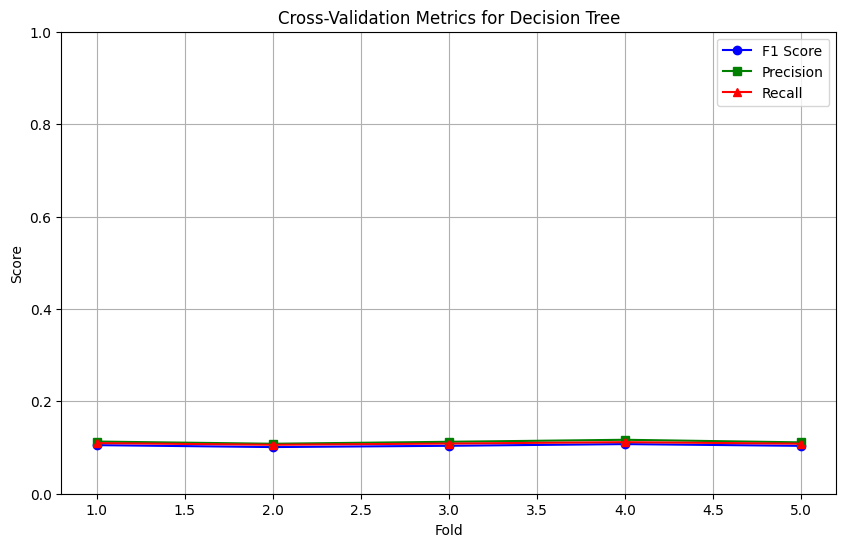

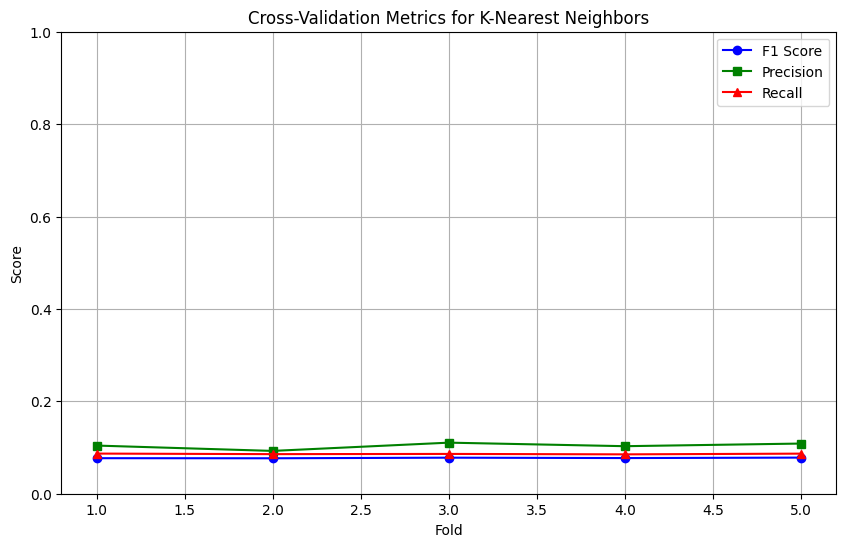

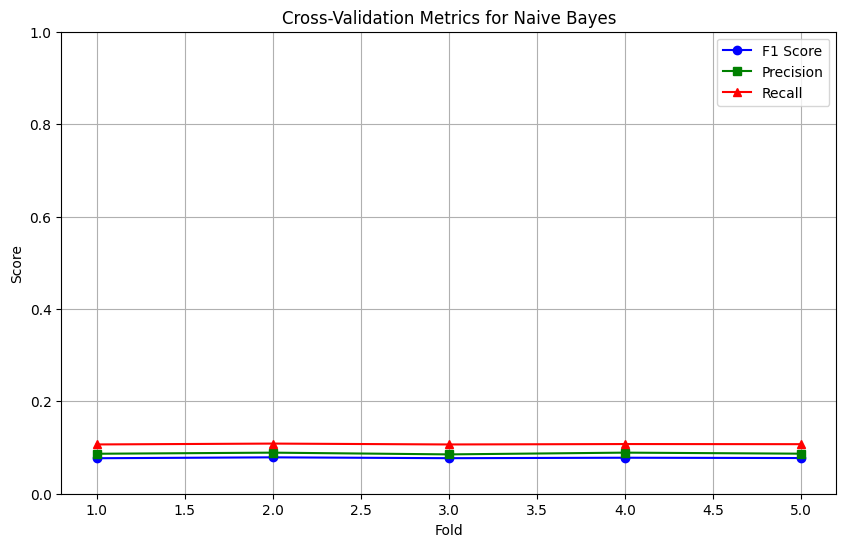

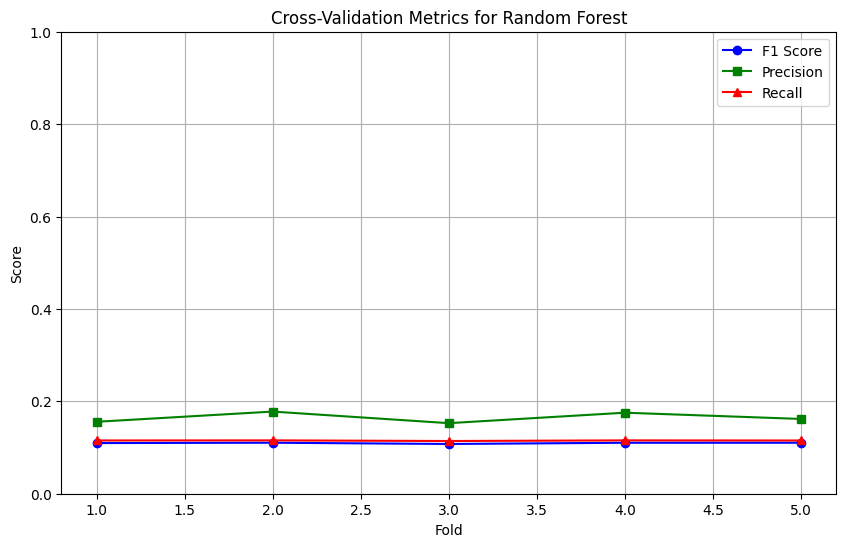

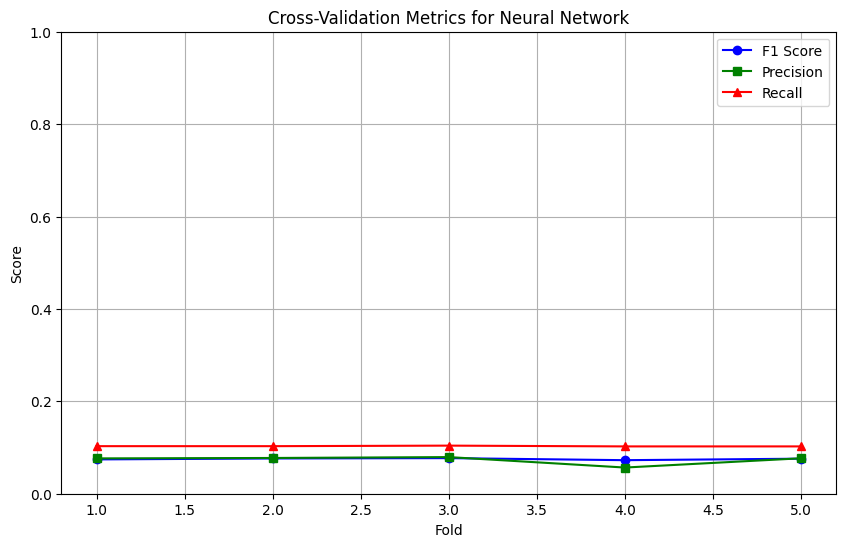

In [ ]:
model_names = list(cv_results.keys())
for model_name in model_names:
    display_kfold_metrics_with_title(model_name, cv_results[model_name]['f1_scores'],
                                      cv_results[model_name]['precision_scores'],
                                      cv_results[model_name]['recall_scores'])

### **Deep Learning Models**

CNN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_joint, y_df_joint, test_size=0.2, random_state=42, stratify=y_df_joint)

In [ ]:
# Store results
f1_scores = []
precision_scores = []
recall_scores = []

# Pre-fit the LabelEncoder ONCE on the entire dataset
le = LabelEncoder()
le.fit(y_df.values.ravel())
num_classes = len(le.classes_)

for train_idx, val_idx in kf.split(X_selected):
    # 1. Split the folds
    X_train_fold, X_val_fold = X_selected.iloc[train_idx], X_selected.iloc[val_idx]
    y_train_fold, y_val_fold = y_df.iloc[train_idx], y_df.iloc[val_idx]

    # 2. Expand dims
    X_train_fold_expanded = np.expand_dims(X_train_fold, axis=-1)
    X_val_fold_expanded = np.expand_dims(X_val_fold, axis=-1)

    # 3. Encode and one-hot labels
    y_train_fold_enc = le.transform(y_train_fold.values.ravel())
    y_val_fold_enc = le.transform(y_val_fold.values.ravel())

    y_train_fold_cat = to_categorical(y_train_fold_enc, num_classes=num_classes)
    y_val_fold_cat = to_categorical(y_val_fold_enc, num_classes=num_classes)

    # 4. Build fresh model
    model = Sequential([
        Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_fold.shape[1], 1)),
        GlobalAveragePooling1D(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')  # use num_classes since some folds may be missing classes
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # 5. Train the model
    model.fit(X_train_fold_expanded, y_train_fold_cat, epochs=3, batch_size=32, verbose=1)

    # 6. Predict
    y_pred_probs = model.predict(X_val_fold_expanded)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # 7. Evaluate
    f1_scores.append(f1_score(y_val_fold_enc, y_pred, average='macro'))
    precision_scores.append(precision_score(y_val_fold_enc, y_pred, average='macro'))
    recall_scores.append(recall_score(y_val_fold_enc, y_pred, average='macro'))


Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3154 - loss: 360.1386
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3432 - loss: 1.7819
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3456 - loss: 1.7871
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3117 - loss: 715.2108
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3451 - loss: 1.7596
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.3442 - loss: 1.8101
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.3153 - loss: 418.5382
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.3454 - loss: 1.7487
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3437 - loss: 1.7963
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3151 - loss: 438.8590
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3432 - loss: 1.7726
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.3449 - loss: 1.8142
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.3211 - loss: 317.4251
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.3444 - loss: 1.7961
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.3466 - loss: 1.7397
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After 3 epochs for each fold, all folds of the model converge at around the same scores for all 3 metrics.

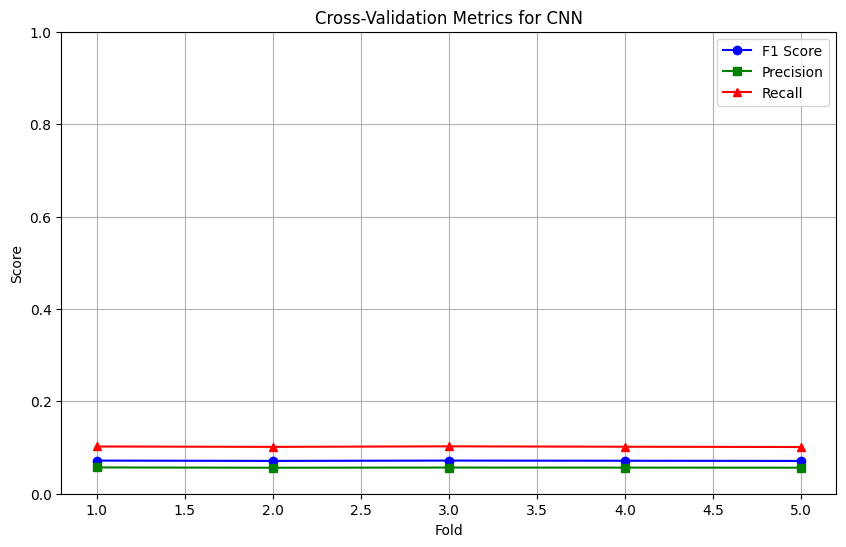

In [ ]:
display_kfold_metrics_with_title('CNN', f1_scores, precision_scores, recall_scores)

LSTM

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store results
f1_scores = []
precision_scores = []
recall_scores = []

lstm_config = {
    'lstm_units': 64,
    'num_layers': 1,
    'dropout_rate': 0.3,
    'learning_rate': 0.001
}

le = LabelEncoder()
y_encoded = le.fit_transform(y_df_joint.values.ravel())

for train_idx, val_idx in kf.split(X_selected):
    X_train_fold, X_val_fold = X_selected_joint.iloc[train_idx], X_selected_joint.iloc[val_idx]
    y_train_fold, y_val_fold = y_encoded[train_idx], y_encoded[val_idx]

    # Expand dims for LSTM
    X_train_fold_expanded = np.expand_dims(X_train_fold, axis=-1)
    X_val_fold_expanded = np.expand_dims(X_val_fold, axis=-1)

    # One-hot encode labels
    y_train_fold_cat = to_categorical(y_train_fold)
    y_val_fold_cat = to_categorical(y_val_fold)

    # Build fresh model
    model = Sequential()
    for i in range(lstm_config['num_layers']):
        return_sequences = (i < lstm_config['num_layers'] - 1)
        model.add(LSTM(units=lstm_config['lstm_units'],
                       return_sequences=return_sequences,
                       input_shape=(X_train_fold.shape[1], 1) if i == 0 else None))
        model.add(Dropout(lstm_config['dropout_rate']))

    model.add(Dense(y_train_fold_cat.shape[1], activation='softmax'))

    optimizer = Adam(learning_rate=lstm_config['learning_rate'])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train_fold_expanded, y_train_fold_cat, epochs=3, batch_size=32, verbose=1)

    # Predict
    y_pred_probs = model.predict(X_val_fold_expanded)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Evaluate
    f1_scores.append(f1_score(y_val_fold, y_pred, average='macro'))
    precision_scores.append(precision_score(y_val_fold, y_pred, average='macro'))
    recall_scores.append(recall_score(y_val_fold, y_pred, average='macro'))

Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4422 - loss: 1.5673
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4487 - loss: 1.5307
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.4510 - loss: 1.5276
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.4442 - loss: 1.5644
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.4476 - loss: 1.5377
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4500 - loss: 1.5317
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.4433 - loss: 1.5670
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4503 - loss: 1.5291
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4511 - loss: 1.5255
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.4415 - loss: 1.5727
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.4477 - loss: 1.5367
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.4504 - loss: 1.5319
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6027/6027 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.4443 - loss: 1.5677
Epoch 2/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.4506 - loss: 1.5295
Epoch 3/3
6027/6027 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - accuracy: 0.4490 - loss: 1.5318
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After 3 epochs for each fold, all folds of the model converge at around the same scores for all 3 metrics.

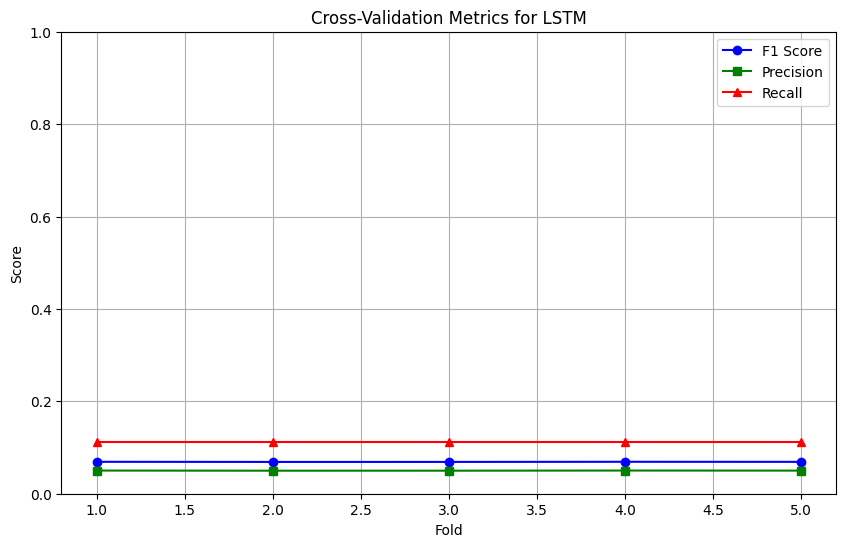

In [ ]:
display_kfold_metrics_with_title('LSTM', f1_scores, precision_scores, recall_scores)

### **Pre-trained Moment Model**

In [ ]:
# k-fold cross-validation loop
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []
precision_scores = []
recall_scores = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train)):
    print(f"Training fold {fold + 1}")

    # Split data into training and validation for the current fold
    X_train_fold, X_val_fold = X_train.iloc[train_idx].values, X_train.iloc[val_idx].values
    y_train_fold, y_val_fold = y_train.iloc[train_idx].values, y_train.iloc[val_idx].values

    # Encode labels
    le = LabelEncoder()
    y_train_fold = le.fit_transform(y_train_fold)
    y_val_fold = le.transform(y_val_fold)

    # Prepare dataset and dataloaders for the fold
    train_dataset = TimeSeriesWindowDataset(X_train_fold, y_train_fold, window_size=96)
    val_dataset = TimeSeriesWindowDataset(X_val_fold, y_val_fold, window_size=96)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

    # Fine-tune on the current fold's training data
    model.train()
    for data, labels in train_loader:
        optimizer.zero_grad()
        output = model(x_enc=data)  # Forward pass
        loss = criterion(output.logits, labels)
        loss.backward()  # Backward pass
        optimizer.step()  # Update model

    # Evaluate model on the validation data for the fold
    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for data, labels in val_loader:
            output = model(x_enc=data)
            val_preds.append(output.logits.argmax(dim=1))  # Get predicted labels
            val_labels.append(labels)

    # Convert lists to tensors for evaluation
    val_preds = torch.cat(val_preds)
    val_labels = torch.cat(val_labels)

    # Calculate metrics (F1-score, Precision, Recall, etc.)
    f1 = f1_score(val_labels, val_preds, average='weighted')
    precision = precision_score(val_labels, val_preds, average='weighted')
    recall = recall_score(val_labels, val_preds, average='weighted')

    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)

Training fold 1


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variant

Training fold 2


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentr

Training fold 3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentr

Training fold 4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/torch/_dynamo/eval_frame.py:745: UserWarning: torch.utils.checkpoint: the use_reentr

Training fold 5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


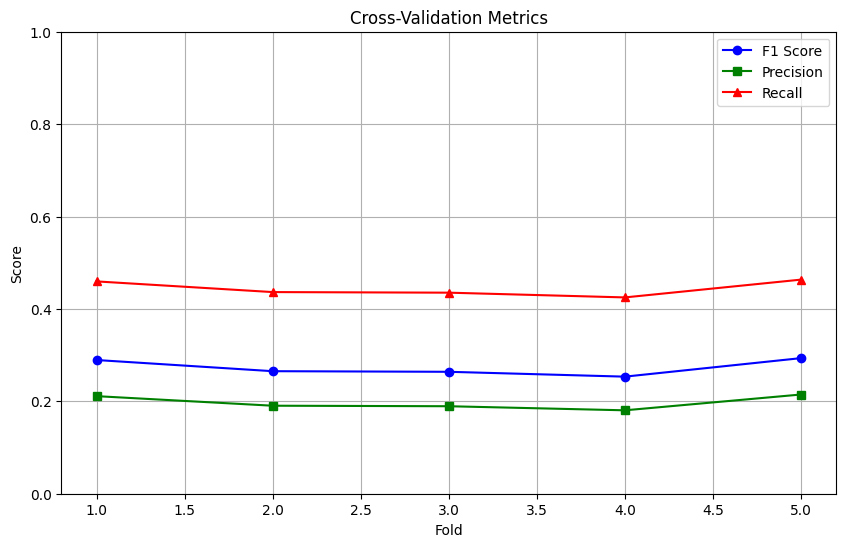

In [ ]:
folds = range(1, len(f1_scores) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, f1_scores, marker='o', label='F1 Score', color='blue')
plt.plot(folds, precision_scores, marker='s', label='Precision', color='green')
plt.plot(folds, recall_scores, marker='^', label='Recall', color='red')

plt.title('Cross-Validation Metrics')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()